# Advanced Data Science &amp; Python for Finance (Spring 2020)
## Final Project:  Part 2 - Data Preparation and Exploration 

-----

***FIN580-59305 Ruixin Zhang(individual work)***

Netid: ruixin3 UIN: 670003383

Master of Science in Finance, University of Illinois at Urbana-Champaign

-----
* [2.1. Choose five companies in your selected industry. For each company you selected, download 120 trading days of data using the Intrinio API. ](#2.1)
* [2.2 Plot the closing price of each security on the same chart.](#2.2)
* [2.3 Calculate and plot the returns and log returns for each security. In a short paragraph analyze the returns. Plot the distribution of the returns for each security. In a short paragraph analyze the returns distribution. ](#2.3)
* [2.4 Moving/Window Statistics: (a) Create a five day moving average using close price. (b) Create a five day moving high price (max()) (c) Create a five day moving low price (min()). ](#2.4)
* [2.5 On the same chart plot the closing price of each security(five charts) including the five day moving average, moving high price and moving low price.](#2.5)

## Packages and Settings

In [3]:
import intrinio_sdk
import configparser as cp

In [4]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import cufflinks as cf 
import matplotlib.pyplot as plt
cf.set_config_file(offline=True)

<a id='2.1'></a>
## 2.1. Choose five companies in your selected industry. For each company you selected, download 120 trading days of data using the Intrinio API. 
### My selected industry is Regional Banks and I decide to choose the five companies from this industry with the top 5 largest market revenues 

In [5]:
sp1500_df = pd.read_csv("C:/Users/z/Desktop/FIN580 PYTHON/sp1500.csv",index_col = 0)
sp1500_df.head()

,ticker,price_close,pct_price_change_lastday,pct_pricechange_30day,pct_price_change_ytd,pct_price_change_12_month,price_earnings_ratio,price_bookvalue_ratio,marketcap_mm,revenue_mm,exchange,industry
company,,,,,,,,,,,,
3M Company,MMM,148.51,1.90,-0.32,-15.82,-16.84,17.10,8.42,85422.41,32348.00,NYSE,Industrial Conglomerates
A. O. Smith Corporation,AOS,44.79,3.42,11.36,-5.98,-10.95,21.51,4.47,7217.48,2881.40,NYSE,Building Products
"AAON, Inc.",AAON,48.94,0.74,-0.22,-0.95,3.36,47.63,8.31,2546.42,492.99,NasdaqGS,Building Products
AAR Corp.,AIR,18.20,9.05,-1.57,-59.65,-45.93,8.79,0.68,629.15,2218.20,NYSE,Aerospace and Defense
"Aaron's, Inc.",AAN,35.78,7.29,51.16,-37.35,-37.85,72.50,1.66,2417.71,4036.83,NYSE,Homefurnishing Retail


In [6]:
sp1500_rb = sp1500_df[sp1500_df['industry']=='Regional Banks']
sp1500_rb.head()

,ticker,price_close,pct_price_change_lastday,pct_pricechange_30day,pct_price_change_ytd,pct_price_change_12_month,price_earnings_ratio,price_bookvalue_ratio,marketcap_mm,revenue_mm,exchange,industry
company,,,,,,,,,,,,
"Allegiance Bancshares, Inc.",ABTX,24.13,5.88,-0.86,-35.82,-31.78,11.01,0.70,492.32,176.89,NasdaqGM,Regional Banks
Ameris Bancorp,ABCB,23.45,7.57,-2.74,-44.88,-35.31,9.93,0.67,1624.12,708.89,NasdaqGS,Regional Banks
Associated Banc-Corp,ASB,14.19,5.19,3.28,-35.62,-37.43,8.01,0.61,2146.90,1156.97,NYSE,Regional Banks
BancorpSouth Bank,BXS,20.82,6.06,0.77,-33.72,-30.20,9.90,0.85,2136.81,910.88,NYSE,Regional Banks
Bank of Hawaii Corporation,BOH,63.25,3.74,7.15,-33.53,-22.55,12.18,1.91,2530.68,634.52,NYSE,Regional Banks


**The five companies I have selected from the industry of Regional Banks based on the descending order of market capitalization**

In [7]:
sp1500_rb = sp1500_rb.sort_values(['marketcap_mm'],ascending=False)[["ticker", "marketcap_mm","industry"]]
sp1500_rb.head()

,ticker,marketcap_mm,industry
company,,,
Truist Financial Corporation,TFC,48831.99,Regional Banks
"The PNC Financial Services Group, Inc.",PNC,44560.07,Regional Banks
First Republic Bank,FRC,17809.65,Regional Banks
M&T Bank Corporation,MTB,13451.96,Regional Banks
Fifth Third Bancorp,FITB,12871.08,Regional Banks


In [8]:
## The tickers of the 5 companies I have selected from my chosen industry
selected_company = list(sp1500_rb['ticker'])[:5]
selected_company

['TFC', 'PNC', 'FRC', 'MTB', 'FITB']

### API setting

In [9]:
#Load API in secure mode
cfg = cp.ConfigParser()
cfg.read("C:/Users/z/Desktop/FIN580 PYTHON/credentials_Ruixin Zhang.cfg")

['C:/Users/z/Desktop/FIN580 PYTHON/credentials_Ruixin Zhang.cfg']

In [10]:
#Connect to API(sandbox API key)
API_KEY = cfg['intrinio']['app_key']
intrinio_sdk.ApiClient().configuration.api_key['api_key'] = API_KEY
security_api = intrinio_sdk.SecurityApi()

### Stock: TFC

In [11]:
identifier = 'TFC' #TICKER
start_date = '2019-11-01' #start
end_date = '2020-05-09' #end
frequency = 'daily' 
page_size = 120 
next_page = ''

In [12]:
response = security_api.get_security_stock_prices(identifier,
                                                  start_date = start_date,
                                                  end_date = end_date,
                                                 page_size = page_size)

In [13]:
response = [p.to_dict() for p in response.stock_prices]

In [14]:
tfc_df = pd.DataFrame.from_dict(response)
tfc_df['secid'] = "TFC"
tfc_df.index = pd.DatetimeIndex(tfc_df['date'])
tfc_df = tfc_df.drop('date',axis=1)
tfc_df = tfc_df.sort_index()
tfc_df.head()

,adj_close,adj_high,adj_low,adj_open,adj_volume,close,frequency,high,intraperiod,low,open,volume,secid
date,,,,,,,,,,,,,
2019-11-15,53.388080,53.720473,53.192556,53.671592,5438350.0,54.61,daily,54.95,False,54.41,54.90,5438350.0,TFC
2019-11-18,53.779130,53.818235,53.241437,53.241437,3980014.0,55.01,daily,55.05,False,54.46,54.46,3980014.0,TFC
2019-11-19,53.466290,53.964879,53.280542,53.915998,5822634.0,54.69,daily,55.20,False,54.50,55.15,5822634.0,TFC
2019-11-20,53.192556,53.417409,52.752624,53.182779,4566679.0,54.41,daily,54.64,False,53.96,54.40,4566679.0,TFC
2019-11-21,52.967702,53.485843,52.713519,53.446738,3551697.0,54.18,daily,54.71,False,53.92,54.67,3551697.0,TFC


In [15]:
## make sure there are 120 trading days of data
tfc_df.shape

(120, 13)

### Stock: PNC

In [16]:
identifier = 'PNC' #TICKER
start_date = '2019-11-01' #start
end_date = '2020-05-09' #end
frequency = 'daily' 
page_size = 120 
next_page = ''

In [17]:
response = security_api.get_security_stock_prices(identifier,
                                                  start_date = start_date,
                                                  end_date = end_date,
                                                 page_size = page_size)

In [18]:
response = [p.to_dict() for p in response.stock_prices]

In [19]:
pnc_df = pd.DataFrame.from_dict(response)
pnc_df['secid'] = "PNC"
pnc_df.index = pd.DatetimeIndex(pnc_df['date'])
pnc_df = pnc_df.drop('date',axis=1)
pnc_df = pnc_df.sort_index()
pnc_df.head()

,adj_close,adj_high,adj_low,adj_open,adj_volume,close,frequency,high,intraperiod,low,open,volume,secid
date,,,,,,,,,,,,,
2019-11-15,147.891717,147.950536,146.470247,147.156474,1773044.0,150.86,daily,150.92,False,149.41,150.11,1773044.0,PNC
2019-11-18,148.724992,149.430826,147.528997,147.558407,1616634.0,151.71,daily,152.43,False,150.49,150.52,1616634.0,PNC
2019-11-19,148.734796,150.087643,147.783881,149.009286,1646957.0,151.72,daily,153.10,False,150.75,152.00,1646957.0,PNC
2019-11-20,148.793615,149.656300,147.479981,148.293650,1456386.0,151.78,daily,152.66,False,150.44,151.27,1456386.0,PNC
2019-11-21,148.705386,150.509183,148.332863,149.666104,1402898.0,151.69,daily,153.53,False,151.31,152.67,1402898.0,PNC


In [20]:
## make sure there are 120 trading days of data
pnc_df.shape

(120, 13)

### Stock: FRC

In [21]:
identifier = 'FRC' #TICKER
start_date = '2019-11-01' #start
end_date = '2020-05-09' #end
frequency = 'daily' 
page_size = 120 
next_page = ''

In [22]:
response = security_api.get_security_stock_prices(identifier,
                                                  start_date = start_date,
                                                  end_date = end_date,
                                                 page_size = page_size)

In [23]:
response = [p.to_dict() for p in response.stock_prices]

In [24]:
frc_df = pd.DataFrame.from_dict(response)
frc_df['secid'] = "FRC"
frc_df.index = pd.DatetimeIndex(frc_df['date'])
frc_df = frc_df.drop('date',axis=1)
frc_df = frc_df.sort_index()
frc_df.head()

,adj_close,adj_high,adj_low,adj_open,adj_volume,close,frequency,high,intraperiod,low,open,volume,secid
date,,,,,,,,,,,,,
2019-11-15,108.402928,109.150260,108.313248,109.110402,637681.0,108.79,daily,109.540,False,108.70,109.50,637681.0,FRC
2019-11-18,107.984423,108.253462,106.918230,108.034245,1074047.0,108.37,daily,108.640,False,107.30,108.42,1074047.0,FRC
2019-11-19,108.582288,109.060580,107.815027,108.542430,664670.0,108.97,daily,109.450,False,108.20,108.93,664670.0,FRC
2019-11-20,108.233533,108.776594,107.047767,108.064138,619230.0,108.62,daily,109.165,False,107.43,108.45,619230.0,FRC
2019-11-21,107.426415,108.921078,107.276949,108.711825,890139.0,107.81,daily,109.310,False,107.66,109.10,890139.0,FRC


In [25]:
## make sure there are 120 trading days of data
frc_df.shape

(120, 13)

### Stock:MTB

In [26]:
identifier = 'MTB' #TICKER
start_date = '2019-11-01' #start
end_date = '2020-05-09' #end
frequency = 'daily' 
page_size = 120 
next_page = ''

In [27]:
response = security_api.get_security_stock_prices(identifier,
                                                  start_date = start_date,
                                                  end_date = end_date,
                                                 page_size = page_size)

In [28]:
response = [p.to_dict() for p in response.stock_prices]

In [29]:
mtb_df = pd.DataFrame.from_dict(response)
mtb_df['secid'] = "MTB"
mtb_df.index = pd.DatetimeIndex(mtb_df['date'])
mtb_df = mtb_df.drop('date',axis=1)
mtb_df = mtb_df.sort_index()
mtb_df.head()

,adj_close,adj_high,adj_low,adj_open,adj_volume,close,frequency,high,intraperiod,low,open,volume,secid
date,,,,,,,,,,,,,
2019-11-15,161.616001,162.572075,161.221743,161.576575,530713.0,163.97,daily,164.94,False,163.57,163.93,530713.0,MTB
2019-11-18,160.630357,161.438585,160.098110,160.995045,669102.0,162.97,daily,163.79,False,162.43,163.34,669102.0,MTB
2019-11-19,160.541649,161.527293,159.871412,161.359734,453012.0,162.88,daily,163.88,False,162.20,163.71,453012.0,MTB
2019-11-20,160.630357,161.655427,158.757634,160.620501,698345.0,162.97,daily,164.01,False,161.07,162.96,698345.0,MTB
2019-11-21,160.699352,161.921550,159.703852,161.487867,405174.0,163.04,daily,164.28,False,162.03,163.84,405174.0,MTB


In [30]:
## make sure there are 120 trading days of data
mtb_df.shape

(120, 13)

### Stock:FITB

In [31]:
identifier = 'FITB' #TICKER
start_date = '2019-11-01' #start
end_date = '2020-05-09' #end
frequency = 'daily' 
page_size = 120 
next_page = ''

In [32]:
response = security_api.get_security_stock_prices(identifier,
                                                  start_date = start_date,
                                                  end_date = end_date,
                                                 page_size = page_size)

In [33]:
response = [p.to_dict() for p in response.stock_prices]

In [34]:
fitb_df = pd.DataFrame.from_dict(response)
fitb_df['secid'] = "FITB"
fitb_df.index = pd.DatetimeIndex(fitb_df['date'])
fitb_df = fitb_df.drop('date',axis=1)
fitb_df = fitb_df.sort_index()
fitb_df.head()

,adj_close,adj_high,adj_low,adj_open,adj_volume,close,frequency,high,intraperiod,low,open,volume,secid
date,,,,,,,,,,,,,
2019-11-15,29.336349,29.375373,28.926596,29.111960,4760907.0,30.07,daily,30.1100,False,29.650,29.84,4760907.0,FITB
2019-11-18,29.121716,29.382495,28.955864,29.316837,4022209.0,29.85,daily,30.1173,False,29.680,30.05,4022209.0,FITB
2019-11-19,29.141228,29.336349,28.965620,29.199765,3151684.0,29.87,daily,30.0700,False,29.690,29.93,3151684.0,FITB
2019-11-20,29.033912,29.224155,28.809524,29.024156,3237687.0,29.76,daily,29.9550,False,29.530,29.75,3237687.0,FITB
2019-11-21,29.053424,29.224155,28.921718,29.160740,3398414.0,29.78,daily,29.9550,False,29.645,29.89,3398414.0,FITB


In [35]:
## make sure there are 120 trading days of data
fitb_df.shape

(120, 13)

<a id='2.2'></a>
## 2.2 Plot the closing price of each security on the same chart.

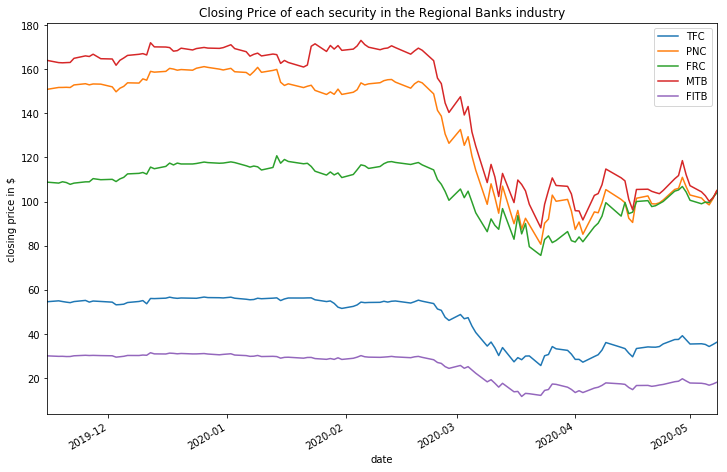

In [36]:
tfc_df['close'].plot(figsize = (12,8))
pnc_df['close'].plot(figsize = (12,8))
frc_df['close'].plot(figsize = (12,8))
mtb_df['close'].plot(figsize = (12,8))
fitb_df['close'].plot(figsize = (12,8))
plt.ylabel("closing price in $")
plt.title('Closing Price of each security in the Regional Banks industry')
plt.legend(['TFC', 'PNC', 'FRC', 'MTB', 'FITB'])
plt.show()

## Data Preliminary Processing and cleaning for question 2.3-2.5

### Stock: TFC

In [37]:
tfc_df = tfc_df[['secid','close','high','low']]
tfc_df['return'] = tfc_df['close'].pct_change()
tfc_df['log_return'] = np.log(tfc_df['close'].pct_change()+1)
tfc_df['ma05'] = tfc_df['close'].rolling(window = 5).mean()
tfc_df['max05'] = tfc_df['high'].rolling(window = 5).max()
tfc_df['min05'] = tfc_df['low'].rolling(window = 5).min()
tfc_df = tfc_df.dropna()
tfc_df.head()

,secid,close,high,low,return,log_return,ma05,max05,min05
date,,,,,,,,,
2019-11-21,TFC,54.18,54.71,53.9200,-0.004227,-0.004236,54.580,55.20,53.92
2019-11-22,TFC,54.67,55.00,54.1800,0.009044,0.009003,54.592,55.20,53.92
2019-11-25,TFC,55.20,55.26,54.7041,0.009695,0.009648,54.630,55.26,53.92
2019-11-26,TFC,54.43,55.09,54.1550,-0.013949,-0.014047,54.578,55.26,53.92
2019-11-27,TFC,54.92,54.98,54.5514,0.009002,0.008962,54.680,55.26,53.92


### Stock: PNC

In [38]:
pnc_df = pnc_df[['secid','close','high','low']]
pnc_df['return'] = pnc_df['close'].pct_change()
pnc_df['log_return'] = np.log(pnc_df['close'].pct_change()+1)
pnc_df['ma05'] = pnc_df['close'].rolling(window = 5).mean()
pnc_df['max05'] = pnc_df['high'].rolling(window = 5).max()
pnc_df['min05'] = pnc_df['low'].rolling(window = 5).min()
pnc_df = pnc_df.dropna()
pnc_df.head()

,secid,close,high,low,return,log_return,ma05,max05,min05
date,,,,,,,,,
2019-11-21,PNC,151.69,153.5300,151.31,-0.000593,-0.000593,151.552,153.5300,149.41
2019-11-22,PNC,152.85,153.7166,150.94,0.007647,0.007618,151.950,153.7166,150.44
2019-11-25,PNC,153.40,154.4200,152.73,0.003598,0.003592,152.288,154.4200,150.44
2019-11-26,PNC,152.89,153.4700,152.34,-0.003325,-0.003330,152.522,154.4200,150.44
2019-11-27,PNC,153.29,154.1500,152.53,0.002616,0.002613,152.824,154.4200,150.94


### Stock: FRC

In [39]:
frc_df = frc_df[['secid','close','high','low']]
frc_df['return'] = frc_df['close'].pct_change()
frc_df['log_return'] = np.log(frc_df['close'].pct_change()+1)
frc_df['ma05'] = frc_df['close'].rolling(window = 5).mean()
frc_df['max05'] = frc_df['high'].rolling(window = 5).max()
frc_df['min05'] = frc_df['low'].rolling(window = 5).min()
frc_df = frc_df.dropna()
frc_df.head()

,secid,close,high,low,return,log_return,ma05,max05,min05
date,,,,,,,,,
2019-11-21,FRC,107.81,109.31,107.66,-0.007457,-0.007485,108.512,109.54,107.30
2019-11-22,FRC,108.35,108.97,107.79,0.005009,0.004996,108.424,109.45,107.30
2019-11-25,FRC,108.93,109.24,108.12,0.005353,0.005339,108.536,109.45,107.43
2019-11-26,FRC,108.95,109.95,108.43,0.000184,0.000184,108.532,109.95,107.43
2019-11-27,FRC,110.39,110.95,109.55,0.013217,0.013130,108.886,110.95,107.66


### Stock: MTB

In [40]:
mtb_df = mtb_df[['secid','close','high','low']]
mtb_df['return'] = mtb_df['close'].pct_change()
mtb_df['log_return'] = np.log(mtb_df['close'].pct_change()+1)
mtb_df['ma05'] = mtb_df['close'].rolling(window = 5).mean()
mtb_df['max05'] = mtb_df['high'].rolling(window = 5).max()
mtb_df['min05'] = mtb_df['low'].rolling(window = 5).min()
mtb_df = mtb_df.dropna()
mtb_df.head()

,secid,close,high,low,return,log_return,ma05,max05,min05
date,,,,,,,,,
2019-11-21,MTB,163.04,164.280,162.03,0.000430,0.000429,163.166,164.94,161.07
2019-11-22,MTB,164.91,165.630,163.00,0.011470,0.011404,163.354,165.63,161.07
2019-11-25,MTB,166.02,166.510,164.71,0.006731,0.006708,163.964,166.51,161.07
2019-11-26,MTB,165.74,166.435,164.67,-0.001687,-0.001688,164.536,166.51,161.07
2019-11-27,MTB,166.78,167.130,165.51,0.006275,0.006255,165.298,167.13,162.03


### Stock: FITB

In [41]:
fitb_df = fitb_df[['secid','close','high','low']]
fitb_df['return'] = fitb_df['close'].pct_change()
fitb_df['log_return'] = np.log(fitb_df['close'].pct_change()+1)
fitb_df['ma05'] = fitb_df['close'].rolling(window = 5).mean()
fitb_df['max05'] = fitb_df['high'].rolling(window = 5).max()
fitb_df['min05'] = fitb_df['low'].rolling(window = 5).min()
fitb_df = fitb_df.dropna()
fitb_df.head()

,secid,close,high,low,return,log_return,ma05,max05,min05
date,,,,,,,,,
2019-11-21,FITB,29.78,29.955,29.645,0.000672,0.000672,29.866,30.1173,29.530
2019-11-22,FITB,30.10,30.190,29.860,0.010745,0.010688,29.872,30.1900,29.530
2019-11-25,FITB,30.33,30.350,30.045,0.007641,0.007612,29.968,30.3500,29.530
2019-11-26,FITB,30.23,30.310,30.075,-0.003297,-0.003303,30.040,30.3500,29.530
2019-11-27,FITB,30.29,30.495,30.140,0.001985,0.001983,30.146,30.4950,29.645


<a id='2.3'></a>
## 2.3 Calculate and plot the returns and log returns for each security. In a short paragraph analyze the returns. Plot the distribution of the returns for each security. In a short paragraph analyze the returns distribution. 

## the returns and log returns for TFC

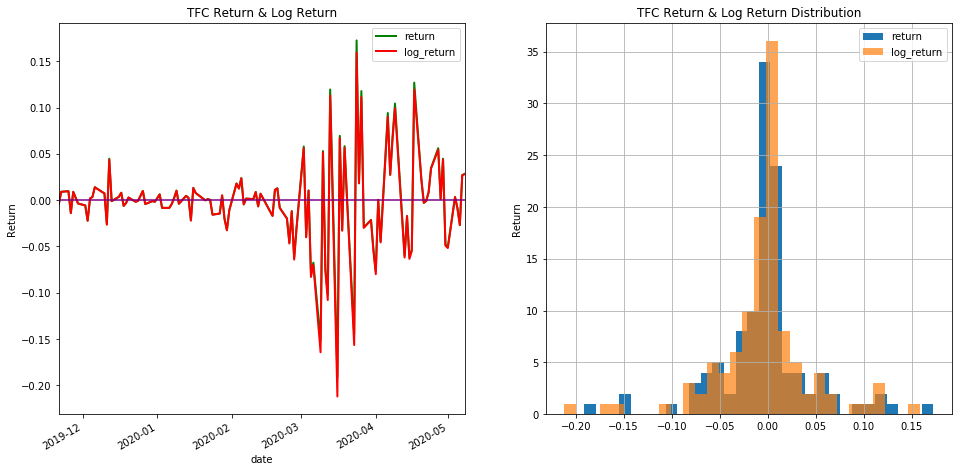

In [42]:
fig = plt.figure(figsize=(16,8))

ax1 = fig.add_subplot(121,  ylabel='Return')
tfc_df['return'].plot(ax=ax1, lw=2., label='return', color = 'green')
tfc_df['log_return'].plot(ax=ax1, lw=2., label='log_return', color = 'red')
plt.axhline(y=0.00, color='purple', linestyle='-')
plt.title('TFC Return & Log Return')
plt.legend()

ax2 = fig.add_subplot(122,  ylabel='Return')
tfc_df['return'].hist(ax=ax2, bins=30, label='return')
tfc_df['log_return'].hist(ax=ax2, bins=30, alpha=0.7, label='log_return')
plt.title('TFC Return & Log Return Distribution')
plt.legend()

plt.show()

## Analysis of TFC returns and log returns

***According to left chart, the volatility of the (log) returns of TFC increases sharply since the beginning of March. It's probably the effect of COVID-19. After May 2020, the volatility of TFC returns decreased and returned to normal gradually like the case on December 2019 and January 2020.***

***According to the right chart, the mean return is about zero, both return distributions are similar to normal distribution.***

## the returns and log returns for PNC

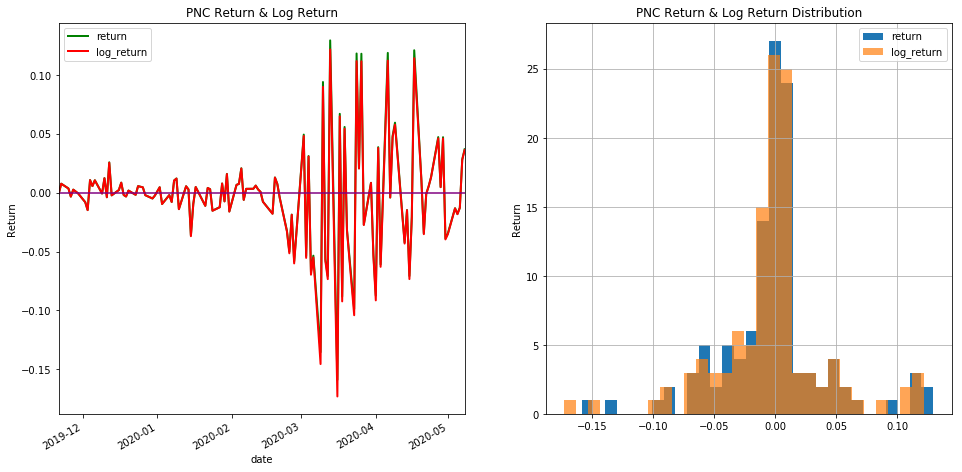

In [43]:
fig = plt.figure(figsize=(16,8))

ax1 = fig.add_subplot(121,  ylabel='Return')
pnc_df['return'].plot(ax=ax1, lw=2., label='return', color = 'green')
pnc_df['log_return'].plot(ax=ax1, lw=2., label='log_return', color = 'red')
plt.axhline(y=0.00, color='purple', linestyle='-')
plt.title('PNC Return & Log Return')
plt.legend()

ax2 = fig.add_subplot(122,  ylabel='Return')
pnc_df['return'].hist(ax=ax2, bins=30, label='return')
pnc_df['log_return'].hist(ax=ax2, bins=30, alpha=0.7, label='log_return')
plt.title('PNC Return & Log Return Distribution')
plt.legend()

plt.show()

## Analysis of PNC returns and log returns

***According to left chart, the volatility of the (log) returns of PNC increases sharply since the end of February. It's probably the effect of COVID-19. After May 2020, the volatility of PNC returns decreased and exhibited the trend of reverting to 0. However, the degree of volatility is still higher than the case during the end of 2019 and the beginning of 2020.***

***According to the right chart, the mean return is about zero, both return distributions are similar to normal distribution, but we can find that the return distributions are a little bit left skewed.***

## the returns and log returns for FRC

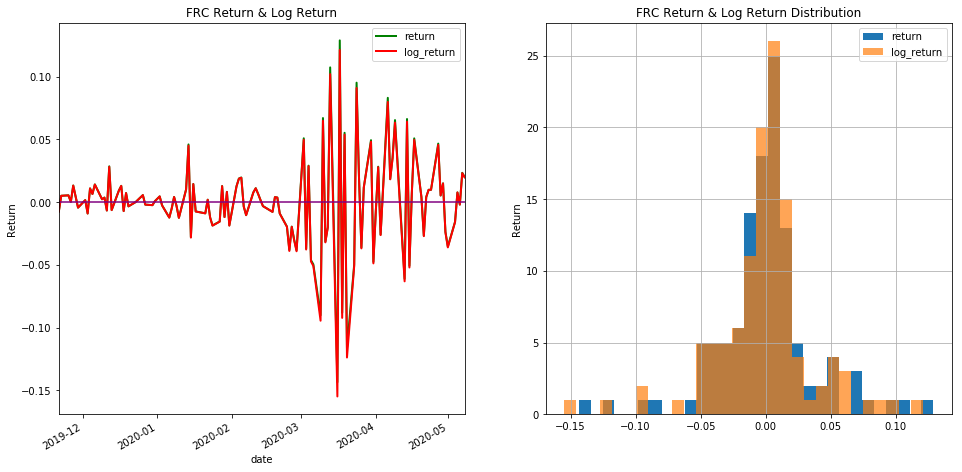

In [44]:
fig = plt.figure(figsize=(16,8))

ax1 = fig.add_subplot(121,  ylabel='Return')
frc_df['return'].plot(ax=ax1, lw=2., label='return', color = 'green')
frc_df['log_return'].plot(ax=ax1, lw=2., label='log_return', color = 'red')
plt.axhline(y=0.00, color='purple', linestyle='-')
plt.title('FRC Return & Log Return')
plt.legend()

ax2 = fig.add_subplot(122,  ylabel='Return')
frc_df['return'].hist(ax=ax2, bins=30, label='return')
frc_df['log_return'].hist(ax=ax2, bins=30, alpha=0.7, label='log_return')
plt.title('FRC Return & Log Return Distribution')
plt.legend()

plt.show()

## Analysis of FRC returns and log returns

***According to left chart, the volatility of the (log) returns of FRC increases sharply since the end of February. It's probably the effect of COVID-19. After May 2020, the volatility of FRC returns decreased and exhibited the trend of reverting to 0. However, the degree of volatility is still higher than the case during the end of 2019 and the beginning of 2020. The largest volatility of FRC stock returns took place around mid March.***

***According to the right chart, the mean return is about zero, both return distributions are similar to normal distribution, but we can find that the return distributions are a little bit right skewed.***

## the returns and log returns for MTB

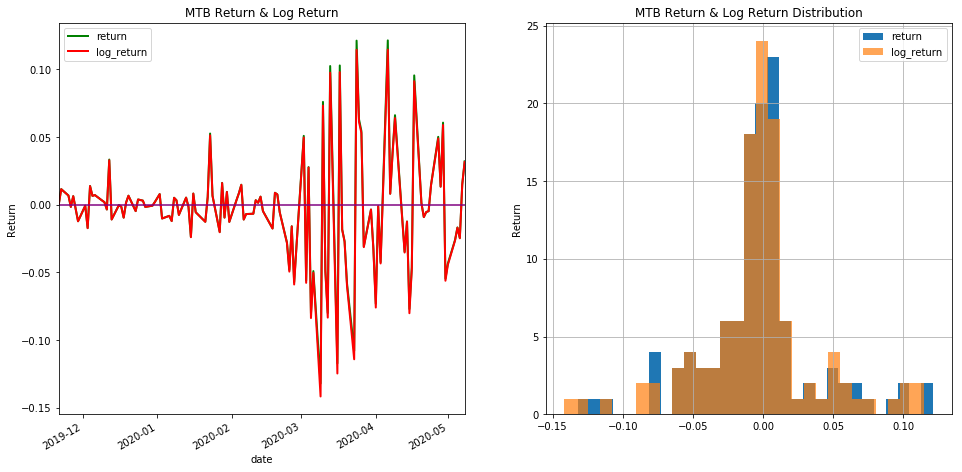

In [45]:
fig = plt.figure(figsize=(16,8))

ax1 = fig.add_subplot(121,  ylabel='Return')
mtb_df['return'].plot(ax=ax1, lw=2., label='return', color = 'green')
mtb_df['log_return'].plot(ax=ax1, lw=2., label='log_return', color = 'red')
plt.axhline(y=0.00, color='purple', linestyle='-')
plt.title('MTB Return & Log Return')
plt.legend()

ax2 = fig.add_subplot(122,  ylabel='Return')
mtb_df['return'].hist(ax=ax2, bins=30, label='return')
mtb_df['log_return'].hist(ax=ax2, bins=30, alpha=0.7, label='log_return')
plt.title('MTB Return & Log Return Distribution')
plt.legend()

plt.show()

## Analysis of MTB return and log returns

***According to left chart, the volatility of the (log) returns of MTB increases sharply since the end of February. It's probably the effect of COVID-19. After May 2020, the volatility of MTB returns decreased and exhibited the trend of mean reverting to 0. However, the degree of volatility is still much higher than the case during the end of 2019 and the beginning of 2020. The largest volatility of MTB stock returns took place around the beginning of March***

***According to the right chart, the mean return is about zero, both return distributions are similar to normal distribution, the variance of both return distributions are very small***

## the returns and log returns for FITB

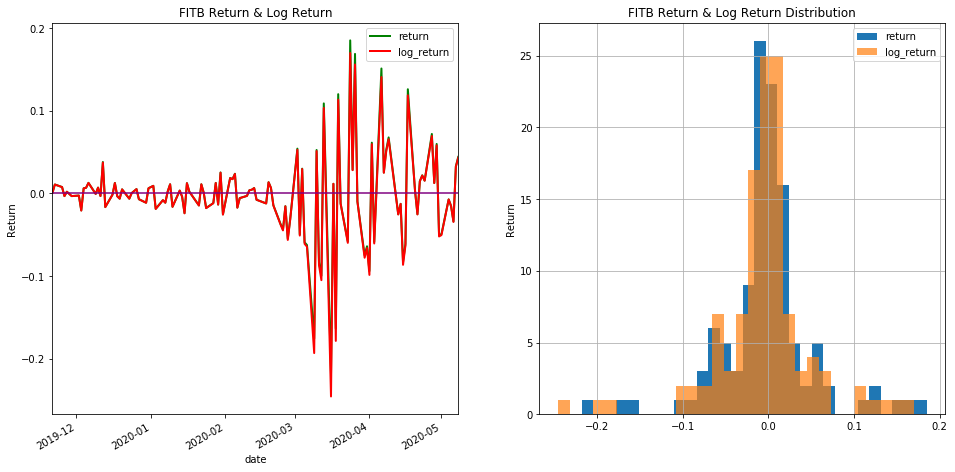

In [46]:
fig = plt.figure(figsize=(16,8))

ax1 = fig.add_subplot(121,  ylabel='Return')
fitb_df['return'].plot(ax=ax1, lw=2., label='return', color = 'green')
fitb_df['log_return'].plot(ax=ax1, lw=2., label='log_return', color = 'red')
plt.axhline(y=0.00, color='purple', linestyle='-')
plt.title('FITB Return & Log Return')
plt.legend()

ax2 = fig.add_subplot(122,  ylabel='Return')
fitb_df['return'].hist(ax=ax2, bins=30, label='return')
fitb_df['log_return'].hist(ax=ax2, bins=30, alpha=0.7, label='log_return')
plt.title('FITB Return & Log Return Distribution')
plt.legend()

plt.show()

## Analysis of FITB return and log returns

***According to left chart, the volatility of the (log) returns of FITB increases sharply since the beginning of March. It's probably the effect of COVID-19. After May 2020, the volatility of FITB returns decreased and exhibited the trend of mean reverting to 0. However, the degree of volatility is still much higher than the case during the end of 2019 and the beginning of 2020. The largest volatility of FITB stock returns took place around Mid March. There largest negative returns of FITB took place in March***

***According to the right chart, the mean return is about zero, both return distributions are VERY similar to normal distribution, the variance of both return distributions are very small. The distributions of both returns for the FITB stock are thin-tailed(both left and right)***

<a id='2.4'></a>
## 2.4 Moving/Window Statistics: (a) Create a five day moving average using close price. (b) Create a five day moving high price (max()) (c) Create a five day moving low price (min()). 

**Actually we have done all the work for question 2.4 inside the section of Data Preliminary Processing and cleaning for question 2.3-2.5 mentioned above, but we will show the outcome of Moving Statistics for all five selected securities here again** 

### Moving/Window Statistics for Stock: TFC

In [47]:
tfc_df_mov = tfc_df[['secid','ma05','max05','min05']]
tfc_df_mov.head()

,secid,ma05,max05,min05
date,,,,
2019-11-21,TFC,54.580,55.20,53.92
2019-11-22,TFC,54.592,55.20,53.92
2019-11-25,TFC,54.630,55.26,53.92
2019-11-26,TFC,54.578,55.26,53.92
2019-11-27,TFC,54.680,55.26,53.92


### Moving/Window Statistics for Stock: PNC

In [48]:
pnc_df_mov = pnc_df[['secid','ma05','max05','min05']]
pnc_df_mov.head()

,secid,ma05,max05,min05
date,,,,
2019-11-21,PNC,151.552,153.5300,149.41
2019-11-22,PNC,151.950,153.7166,150.44
2019-11-25,PNC,152.288,154.4200,150.44
2019-11-26,PNC,152.522,154.4200,150.44
2019-11-27,PNC,152.824,154.4200,150.94


### Moving/Window Statistics for Stock: FRC

In [49]:
frc_df_mov = frc_df[['secid','ma05','max05','min05']]
frc_df_mov.head()

,secid,ma05,max05,min05
date,,,,
2019-11-21,FRC,108.512,109.54,107.30
2019-11-22,FRC,108.424,109.45,107.30
2019-11-25,FRC,108.536,109.45,107.43
2019-11-26,FRC,108.532,109.95,107.43
2019-11-27,FRC,108.886,110.95,107.66


### Moving/Window Statistics for Stock: MTB

In [50]:
mtb_df_mov = mtb_df[['secid','ma05','max05','min05']]
mtb_df_mov.head()

,secid,ma05,max05,min05
date,,,,
2019-11-21,MTB,163.166,164.94,161.07
2019-11-22,MTB,163.354,165.63,161.07
2019-11-25,MTB,163.964,166.51,161.07
2019-11-26,MTB,164.536,166.51,161.07
2019-11-27,MTB,165.298,167.13,162.03


### Moving/Window Statistics for Stock: FITB

In [51]:
fitb_df_mov = fitb_df[['secid','ma05','max05','min05']]
fitb_df_mov.head()

,secid,ma05,max05,min05
date,,,,
2019-11-21,FITB,29.866,30.1173,29.530
2019-11-22,FITB,29.872,30.1900,29.530
2019-11-25,FITB,29.968,30.3500,29.530
2019-11-26,FITB,30.040,30.3500,29.530
2019-11-27,FITB,30.146,30.4950,29.645


<a id='2.5'></a>
## 2.5 On the same chart plot the closing price of each security(five charts) including the five day moving average, moving high price and moving low price. 

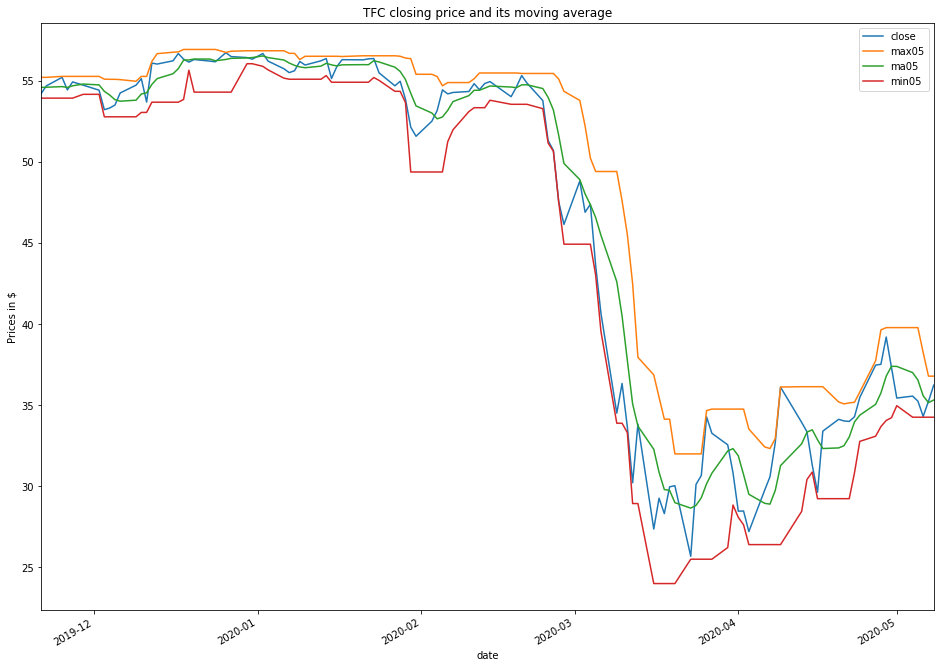

In [54]:
tfc_df[['close',"max05","ma05","min05"]].plot(figsize = (16,12))
plt.ylabel("Prices in $")
plt.title('TFC closing price and its moving average')
plt.show()

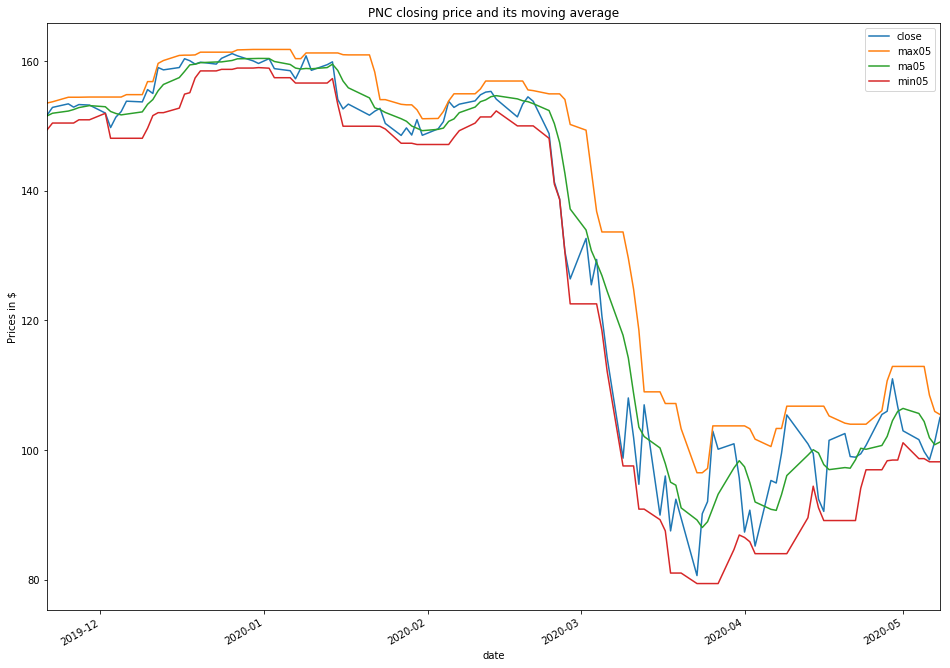

In [55]:
pnc_df[['close',"max05","ma05","min05"]].plot(figsize = (16,12))
plt.ylabel("Prices in $")
plt.title('PNC closing price and its moving average')
plt.show()

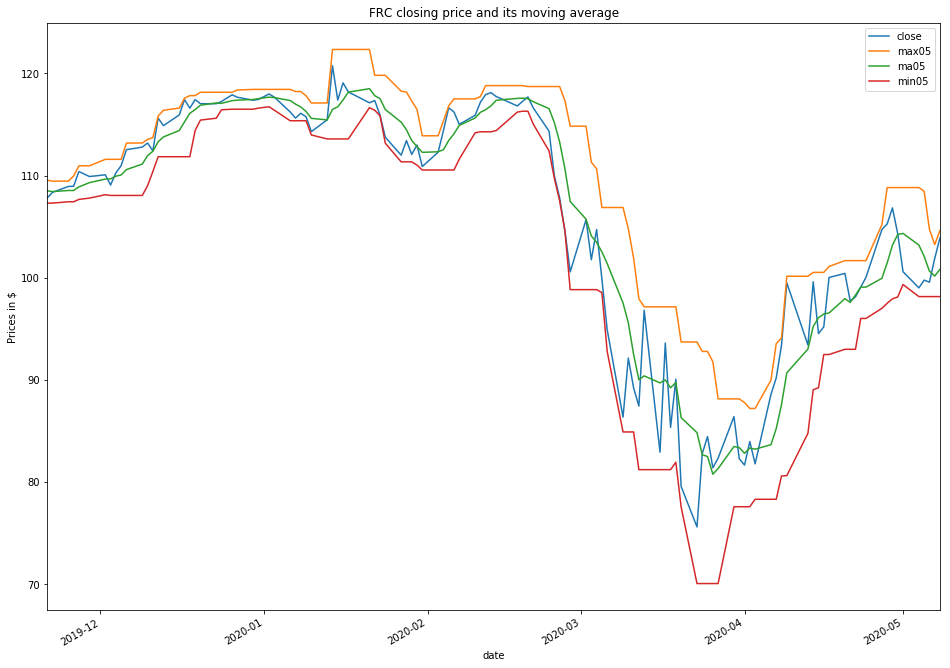

In [58]:
frc_df[['close',"max05","ma05","min05"]].plot(figsize = (16,12))
plt.ylabel("Prices in $")
plt.title('FRC closing price and its moving average')
plt.show()

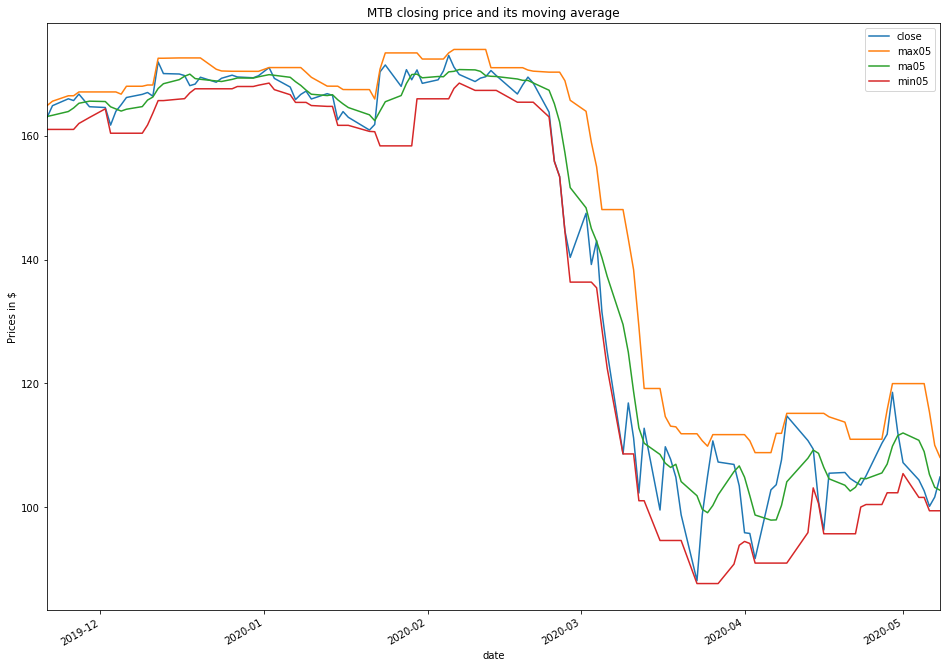

In [59]:
mtb_df[['close',"max05","ma05","min05"]].plot(figsize = (16,12))
plt.ylabel("Prices in $")
plt.title('MTB closing price and its moving average')
plt.show()

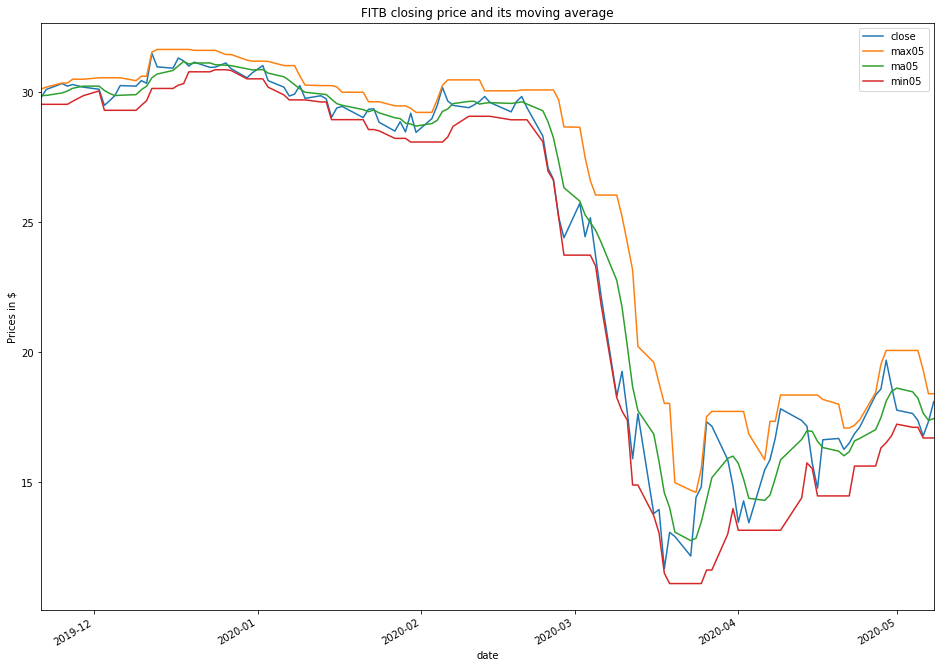

In [60]:
fitb_df[['close',"max05","ma05","min05"]].plot(figsize = (16,12))
plt.ylabel("Prices in $")
plt.title('FITB closing price and its moving average')
plt.show()